# Fractales

Practicando algunas nociones fundamentales sobre Fractales

Autor: Alejandro Nadal

### Conjunto de Cantor

Algoritmo

Dado el intervalo [0-1], dividimos el mismo en tres subintervalos, tomamos los dos exteriores. Repetimos el proceso con los dos exteriores. Los intervalos son equivalentes en tamaño

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import random

Aqui el algoritmo, como resultado nos deja todos los elementos del conjunto de Cantor, en cada iteracion, en una lista

In [3]:
sets = [[0,1]]
history=[]
new_set=[]
iteraciones = 8
j=0
random.seed()
for i in range(0,iteraciones):
    while j < pow(2,i):
        elem=sets[j]
        new_set.append([elem[0],((elem[1]-elem[0])/3)+elem[0]])
        new_set.append([((elem[1]-elem[0])*2/3)+elem[0],elem[1]])
        j+=1
    history.append(sets)
    sets=new_set
    new_set=[]
    j=0
        
for item in history:
    print(item)
    print('\n')

[[0, 1]]


[[0, 0.3333333333333333], [0.6666666666666666, 1]]


[[0, 0.1111111111111111], [0.2222222222222222, 0.3333333333333333], [0.6666666666666666, 0.7777777777777778], [0.8888888888888888, 1]]


[[0, 0.037037037037037035], [0.07407407407407407, 0.1111111111111111], [0.2222222222222222, 0.25925925925925924], [0.2962962962962963, 0.3333333333333333], [0.6666666666666666, 0.7037037037037037], [0.7407407407407407, 0.7777777777777778], [0.8888888888888888, 0.9259259259259259], [0.9629629629629629, 1]]


[[0, 0.012345679012345678], [0.024691358024691357, 0.037037037037037035], [0.07407407407407407, 0.08641975308641975], [0.09876543209876543, 0.1111111111111111], [0.2222222222222222, 0.2345679012345679], [0.24691358024691357, 0.25925925925925924], [0.2962962962962963, 0.30864197530864196], [0.32098765432098764, 0.3333333333333333], [0.6666666666666666, 0.6790123456790124], [0.691358024691358, 0.7037037037037037], [0.7407407407407407, 0.7530864197530864], [0.7654320987654321, 0.777777777

Ahora, usamos Matplotlib para graficar el avance del conjunto

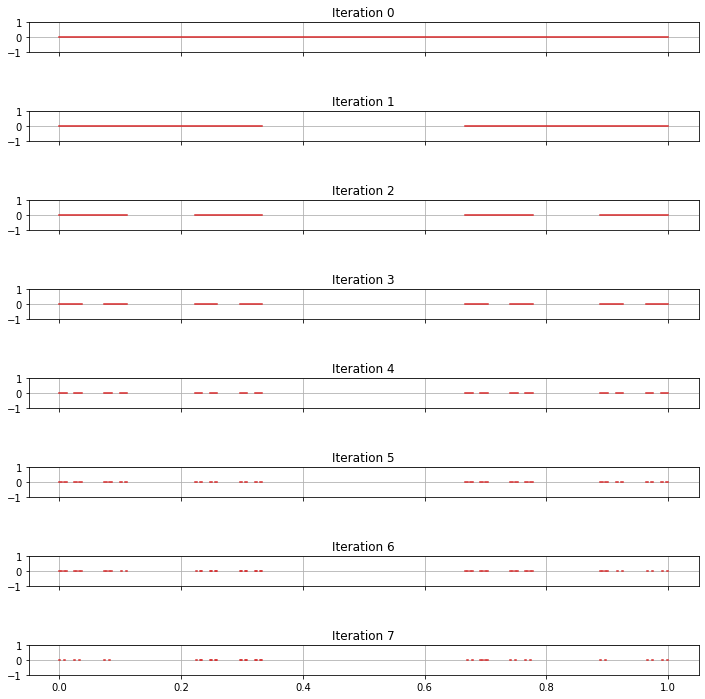

In [4]:
i=0
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(iteraciones, hspace = 2)
plots=gs.subplots(sharex=True, sharey=True)
for set_t in history:
    for line in set_t:
        temp_ar = np.array([0,0])
        plots[i].set_title('Iteration '+str(i))
        plots[i].set_ylim([-1,1])
        plots[i].margins(0.05)
        plots[i].plot(line,temp_ar, 'tab:red')
        plots[i].grid(b=True)
    i+=1

Aqui tenemos al Conjunto, que va replicando su patron fractal. Ahora, vamos a hacer una linea costera mediante este fractal. Para ello, vamos a darle altura a los puntos, mediante una distribucion normal de media 0.5 y variancia de 0.2

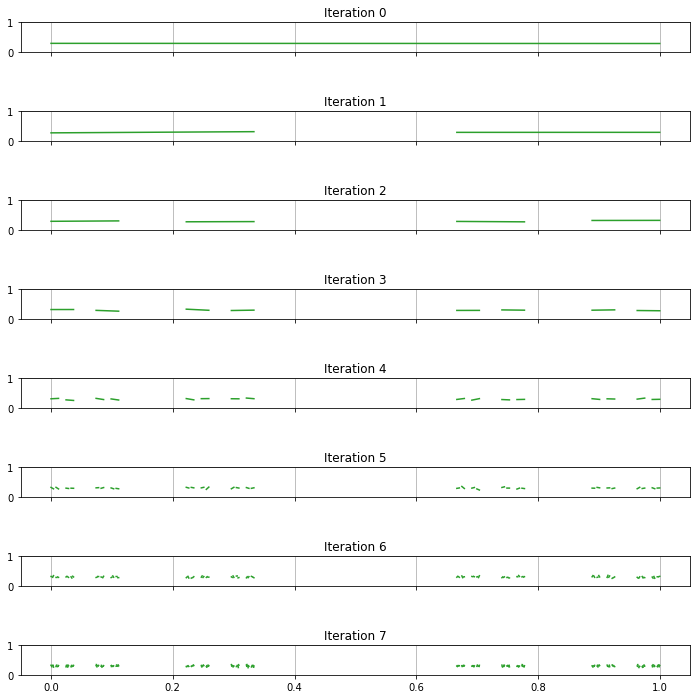

In [134]:
i=0

fig = plt.figure(figsize=(12,12)) #tamaño en pulgadas
#gridspec allows me to 
gs = fig.add_gridspec(iteraciones, hspace = 2) # grilla donde iran los graficos, hspace es la separacion
plots=gs.subplots(sharex=True, sharey=True) # comparten ejes verticales y horizontales

#se almacenan los elementos x e y en cada segmento 
combined_x_y=[]
combined_x_y_history=[]

for set_t in history:
    combined_x_y.append([0,0]) #este punto es solo para cuestiones esteticas
    #line aca, serian dos puntos, x1 y x2, aun sin altura
    for line in set_t:
        #aca damos altura a los puntos, con una distribucion normal
        temp_ar=np.array([random.normalvariate(0.3,0.02),random.normalvariate(0.3,0.02)])
        
        combined_x_y.append([line[0],temp_ar[0]])
        combined_x_y.append([line[1],temp_ar[1]])
        
        plots[i].set_title('Iteration '+str(i))
        plots[i].set_ylim([0,1])
        plots[i].margins(0.05)
        plots[i].plot(line,temp_ar, 'tab:green')
        plots[i].grid(b=True)
    combined_x_y.append([1,0]) #y este ultimo punto tambien es estetico, para completar el grafico
    combined_x_y_history.append(combined_x_y)
    combined_x_y=[]
    heights=[]
    i+=1


In [135]:
tuple_poligonal=[]
for item in combined_x_y_history[3]:
    tuple_poligonal.append(tuple(item))
print(tuple_poligonal)


[(0, 0), (0, 0.31861161659632226), (0.037037037037037035, 0.3195504449571853), (0.07407407407407407, 0.2908009118523404), (0.1111111111111111, 0.26331855872169774), (0.2222222222222222, 0.3309950671866392), (0.25925925925925924, 0.2936300216341518), (0.2962962962962963, 0.2861022195677324), (0.3333333333333333, 0.2981179470142041), (0.6666666666666666, 0.2890018300254174), (0.7037037037037037, 0.2900781274367395), (0.7407407407407407, 0.30618166900330734), (0.7777777777777778, 0.296983864924574), (0.8888888888888888, 0.2963246804604745), (0.9259259259259259, 0.3078840574348503), (0.9629629629629629, 0.28582547327347546), (1, 0.27790325940476157), (1, 0)]


In [ ]:
axes = plt.subplot()
shape = Polygon(tuple_poligonal, fill=True, edgecolor='r', facecolor='xkcd:sand',capstyle='round', joinstyle='miter')
axes.add_patch(shape)
#axes.autoscale_view()
axes.set_facecolor("lightblue")

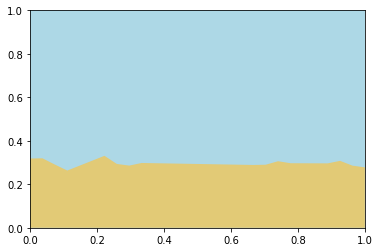

In [137]:
axes = plt.subplot()
shape = Polygon(tuple_poligonal, fill=True, facecolor='xkcd:sand',capstyle='round', joinstyle='miter')
axes.add_patch(shape)
#axes.autoscale_view()
axes.set_facecolor("lightblue")